# Bayesian casino network

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

## Create the network topology

In [2]:
bn = gum.BayesNet("Casino Tips")
bn =gum.fastBN("Day{weekday|weekend}->Busyness{low|high}-> Service{poor|average|excellent}->Tip{yes|no};Coats{single|multiple} -> Service{poor|average|excellent};Newcomer{no|yes}-> Customer{white|yellow|black}-> Tip")
print(bn.variable("Tip"))
print(bn.variable("Day"))
print(bn.variable("Newcomer"))
print(bn.variable("Customer"))
print(bn.variable("Service"))
print(bn.variable("Coats"))
print(bn.variable("Busyness"))

bn

Tip:Labelized({yes|no})
Day:Labelized({weekday|weekend})
Newcomer:Labelized({no|yes})
Customer:Labelized({white|yellow|black})
Service:Labelized({poor|average|excellent})
Coats:Labelized({single|multiple})
Busyness:Labelized({low|high})


(pyAgrum.BayesNet<double>@00000202BF0878D0) BN{nodes: 7, arcs: 6, domainSize: 288, dim: 26, mem: 368o}

## Probability tables

In [3]:
bn.cpt('Day').fillWith([0.7143,0.2857])

(pyAgrum.Potential<double>@00000202BCA68990) 
  Day              |
weekday  |weekend  |
---------|---------|
 0.7143  | 0.2857  |

In [4]:
bn.cpt('Coats').fillWith([0.5913,0.4087])

(pyAgrum.Potential<double>@00000202BCA68750) 
  Coats            |
single   |multiple |
---------|---------|
 0.5913  | 0.4087  |

In [5]:
bn.cpt('Newcomer').fillWith([0.5272, 0.4728])

(pyAgrum.Potential<double>@00000202BCA686D0) 
  Newcomer         |
no       |yes      |
---------|---------|
 0.5272  | 0.4728  |

In [6]:
bn.cpt('Busyness')[{'Day':0}] = [ 0.6429, 0.3571]
bn.cpt('Busyness')[{'Day':1}] = [ 0.1154, 0.8846]
bn.cpt('Busyness').normalizeAsCPT()
bn.cpt('Busyness')

(pyAgrum.Potential<double>@00000202BCA68710) 
      ||  Busyness         |
Day   ||low      |high     |
------||---------|---------|
weekda|| 0.6429  | 0.3571  |
weeken|| 0.1154  | 0.8846  |

In [7]:
bn.cpt('Customer')[{'Newcomer':0}] = [ 0.7938, 0.1250, 0.0813]
bn.cpt('Customer')[{'Newcomer':1}] = [ 1, 0, 0]
bn.cpt('Customer').normalizeAsCPT()
bn.cpt('Customer')

(pyAgrum.Potential<double>@00000202BCA68C10) 
      ||  Customer                   |
Newcom||white    |yellow   |black    |
------||---------|---------|---------|
no    || 0.7937  | 0.1250  | 0.0813  |
yes   || 1.0000  | 0.0000  | 0.0000  |

In [8]:
bn.cpt('Service')[{'Coats':0, 'Busyness':0}] = [ 0, 0.50, 0.50]
bn.cpt('Service')[{'Coats':0, 'Busyness':1}] = [ 0.30, 0.50, 0.20]
bn.cpt('Service')[{'Coats':1, 'Busyness':0}] = [ 0.15, 0.60, 0.25]
bn.cpt('Service')[{'Coats':1, 'Busyness':1}] = [ 0.55, 0.30, 0.15]
bn.cpt('Service').normalizeAsCPT()
bn.cpt('Service')

(pyAgrum.Potential<double>@00000202BCA686B0) 
             ||  Service                    |
Busyne|Coats ||poor     |average  |excellent|
------|------||---------|---------|---------|
low   |single|| 0.0000  | 0.5000  | 0.5000  |
high  |single|| 0.3000  | 0.5000  | 0.2000  |
low   |multip|| 0.1500  | 0.6000  | 0.2500  |
high  |multip|| 0.5500  | 0.3000  | 0.1500  |

In [9]:
bn.cpt('Tip')[{'Service':0, 'Customer':0}] = [ 0.1050, 0.8950]
bn.cpt('Tip')[{'Service':0, 'Customer':1}] = [ 0.0876, 0.9124]
bn.cpt('Tip')[{'Service':0, 'Customer':2}] = [ 0.0750, 0.9250]
bn.cpt('Tip')[{'Service':1, 'Customer':0}] = [ 0.1400, 0.8600]
bn.cpt('Tip')[{'Service':1, 'Customer':1}] = [ 0.1203, 0.8797]
bn.cpt('Tip')[{'Service':1, 'Customer':2}] = [ 0.1052, 0.8948]
bn.cpt('Tip')[{'Service':2, 'Customer':0}] = [ 0.1750, 0.8250]
bn.cpt('Tip')[{'Service':2, 'Customer':1}] = [ 0.1546, 0.8454]
bn.cpt('Tip')[{'Service':2, 'Customer':2}] = [ 0.1392, 0.8606]
bn.cpt('Tip').normalizeAsCPT()
bn.cpt('Tip')

(pyAgrum.Potential<double>@00000202BCA68810) 
             ||  Tip              |
Servic|Custom||yes      |no       |
------|------||---------|---------|
poor  |white || 0.1050  | 0.8950  |
averag|white || 0.1400  | 0.8600  |
excell|white || 0.1750  | 0.8250  |
poor  |yellow|| 0.0876  | 0.9124  |
averag|yellow|| 0.1203  | 0.8797  |
excell|yellow|| 0.1546  | 0.8454  |
poor  |black || 0.0750  | 0.9250  |
averag|black || 0.1052  | 0.8948  |
excell|black || 0.1392  | 0.8608  |

## Inference in Bayesian networks

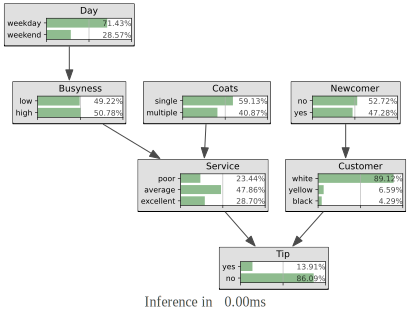

In [10]:
gnb.showInference(bn,size="10")

In [11]:
#ie=gum.LazyPropagation(bn)

## Hard evidence

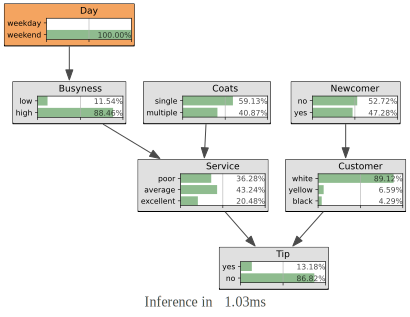

In [12]:
gnb.showInference(bn,evs={'Day':1})

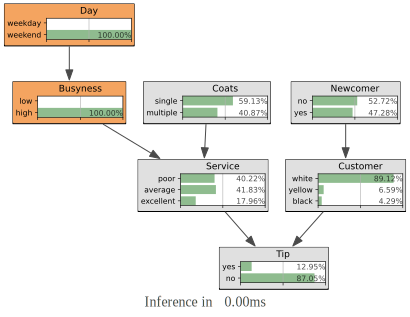

In [13]:
gnb.showInference(bn,evs={'Day':1, 'Busyness':1})

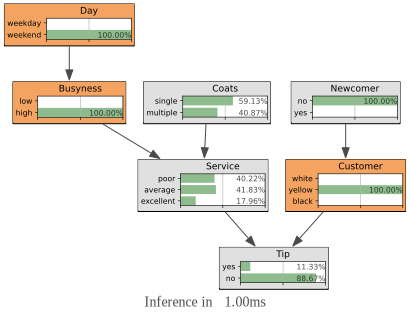

In [14]:
gnb.showInference(bn,evs={'Day':1, 'Busyness':1, 'Customer':1})